In [1]:
import pandas as pd
import requests
import pprint
from pymongo import MongoClient
from bs4 import BeautifulSoup
import json
import time
from lxml import html
from io import StringIO
from datetime import datetime

# Tony Kemp

## 2016

In [12]:
# batting averages

xpath = "//pre[5]/text()"
url = 'https://www.retrosheet.org/boxesetc/2016/Ikempt0010012016.htm'
r = requests.get(url)
page = html.parse(StringIO(r.text))
kemp_2016 = page.xpath(xpath)

kemp_2016_game_data_only = []
for idx, row in enumerate(kemp_2016):
    if idx % 2 == 0:
        kemp_2016_game_data_only.append(row)
        
kemp_2016_game_data_cleaned = []
for row in kemp_2016_game_data_only[2:]:
    kemp_2016_game_data_cleaned.append(row[0:100])
        
kemp_2016_averages = [float(row[87:91]) for row in kemp_2016_game_data_cleaned]


# dates played this year

soup = BeautifulSoup(r.text, 'html.parser')

link_text = []
for a in soup.find_all('a'):
    link_text.append(a.string)

kemp_2016_dates = []
for i in link_text:
    if '2016' in i:
        kemp_2016_dates.append(i)

kemp_2016_dates_cleaned = []
for date in kemp_2016_dates[1:]:
    kemp_2016_dates_cleaned.append(date.replace(' ', '0'))
    
kemp_2016_dates_final = []
for date in kemp_2016_dates_cleaned:
    kemp_2016_dates_final.append(datetime.strftime(datetime.strptime(date, '%m-%d-%Y'), '%m-%d'))
    
kemp_2016_df = pd.DataFrame(kemp_2016_averages, kemp_2016_dates_final).reset_index()
kemp_2016_df.columns = ['2016', 'Batting Average']
kemp_2016_df

,2016,Batting Average
0,05-18,0.667
1,05-19,0.333
2,05-20,0.250
3,05-22,0.222
4,05-24,0.231
5,05-25,0.267
6,05-27,0.250
7,05-28,0.211
8,05-29,0.208
9,06-01,0.200


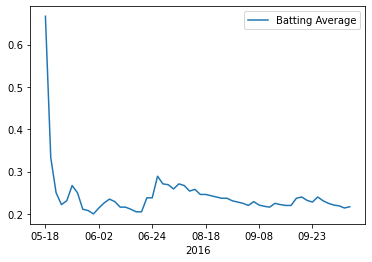

In [13]:
kemp_2016_df.plot('2016', 'Batting Average')

## 2017

In [14]:
# batting averages

xpath = "//pre[5]/text()"
url = 'https://www.retrosheet.org/boxesetc/2017/Ikempt0010022017.htm'
r = requests.get(url)
page = html.parse(StringIO(r.text))
kemp_2017 = page.xpath(xpath)

kemp_2017_game_data_only = []
for idx, row in enumerate(kemp_2017):
    if idx % 2 == 0:
        kemp_2017_game_data_only.append(row)
        

kemp_2017_game_data_cleaned = []
for row in kemp_2017_game_data_only[1:]:
    if row[112:119] == '   Date':
        kemp_2017_game_data_cleaned.append(row[0:112])
    else:
        kemp_2017_game_data_cleaned.append(row)
        
kemp_2017_averages = [float(row[87:91]) for row in kemp_2017_game_data_cleaned]


# dates played this year

soup = BeautifulSoup(r.text, 'html.parser')

link_text = []
for a in soup.find_all('a'):
    link_text.append(a.string)

kemp_2017_dates = []
for i in link_text:
    if '2017' in i:
        kemp_2017_dates.append(i)

kemp_2017_dates_cleaned = []
for date in kemp_2017_dates:
    kemp_2017_dates_cleaned.append(date.replace(' ', '0'))
    
kemp_2017_dates_final = []
for date in kemp_2017_dates_cleaned:
    kemp_2017_dates_final.append(datetime.strftime(datetime.strptime(date, '%m-%d-%Y'), '%m-%d'))
    
kemp_2017_df = pd.DataFrame(kemp_2017_averages, kemp_2017_dates_final).reset_index()
kemp_2017_df.columns = ['2017', 'Batting Average']
kemp_2017_df

,2017,Batting Average
0,04-27,0.000
1,04-29,0.000
2,09-02,0.250
3,09-03,0.250
4,09-06,0.214
5,09-09,0.188
6,09-10,0.176
7,09-13,0.167
8,09-16,0.167
9,09-22,0.150


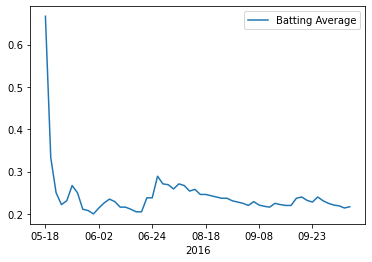

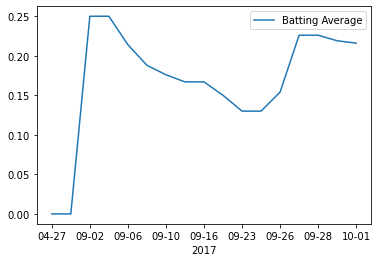

In [15]:
kemp_2016_df.plot('2016', 'Batting Average')
kemp_2017_df.plot('2017', 'Batting Average')

In [16]:
kemp_2016_df.to_csv('csv_from_scrape/kemp_2016_df.csv')
kemp_2017_df.to_csv('csv_from_scrape/kemp_2017_df.csv')